# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity: Increases with t, concave down (see below for more details)*  
- *Call Option – Spot Price Sensitivity: Has an increasing logistic pattern with a point of inflection near K*  
- *Put Option – Time Sensitivity: Decreases with t, concave up*  
- *Put Option – Spot Price Sensitivity: Same as call option shifted down by 2*  

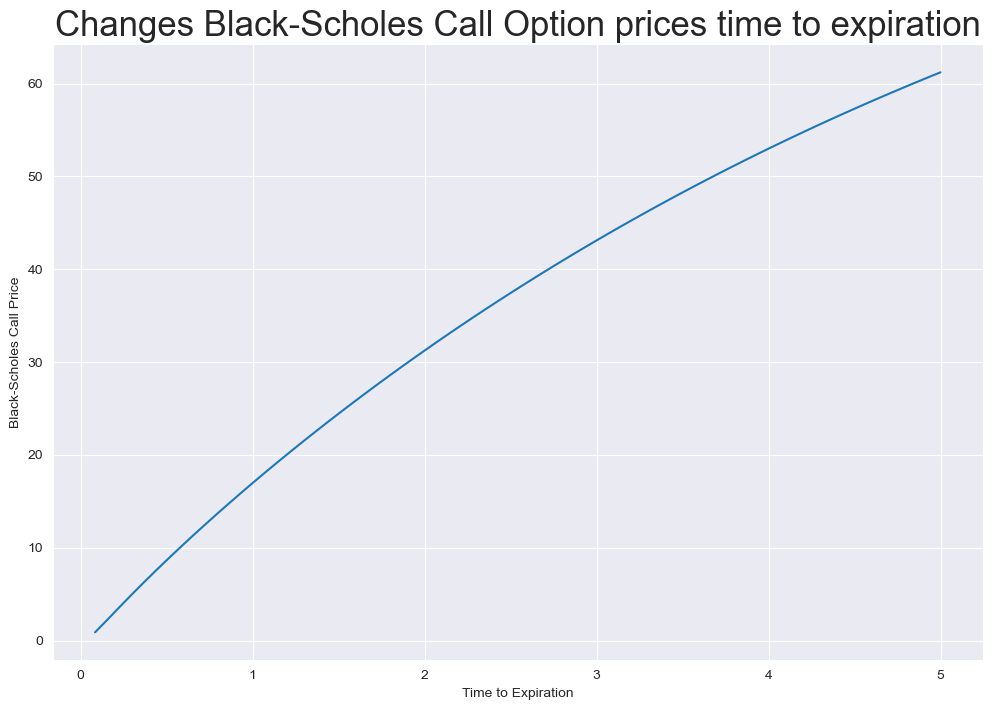

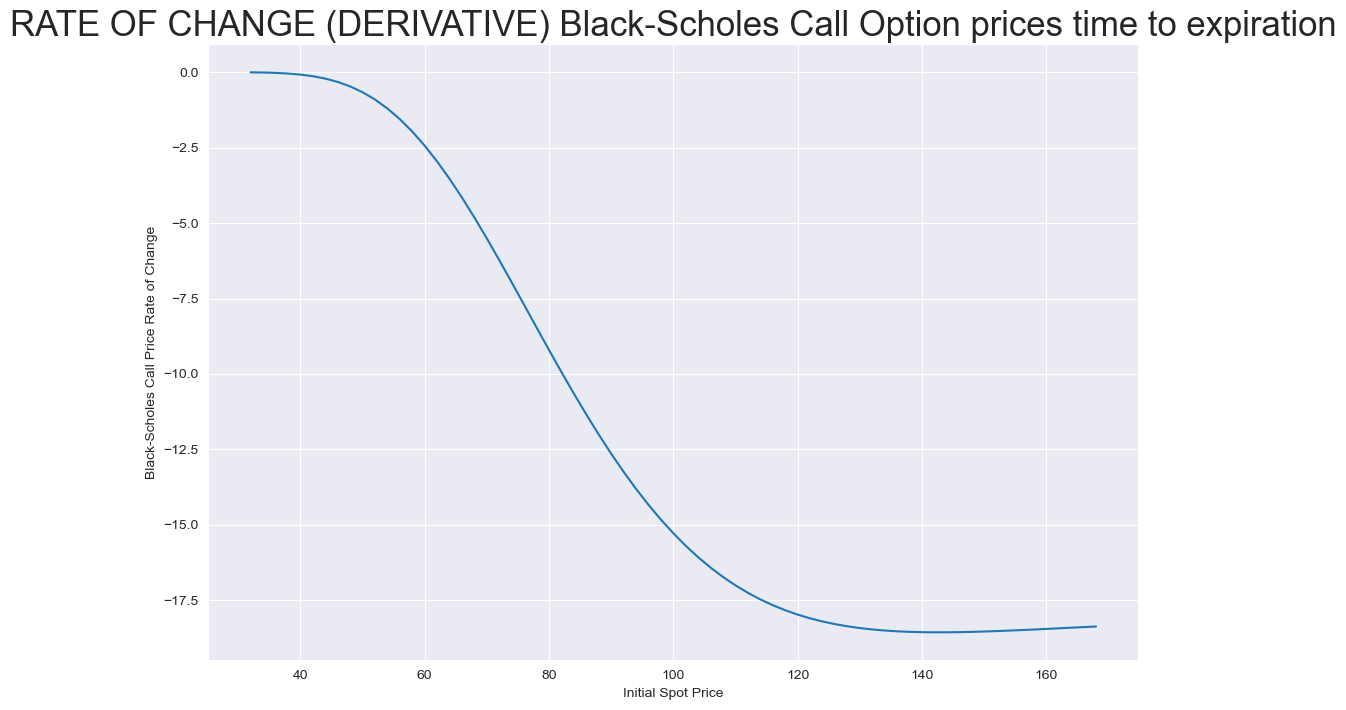

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
S0s = np.linspace(30,168,70)
r=0.2
# To be frisky, let's add a small value of r, say 0.2

call_prices = [bs_call(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

# RATE OF CHANGE

call_prices_change = [100*(bs_call(S0s[i],K,sigma, t = 1,r=r)-bs_call(S0s[i],K,sigma,t=1.01,r=r)) for i in range(len(S0s)-1)]



plt.figure(figsize = (12,8))
plt.title('RATE OF CHANGE (DERIVATIVE) Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(S0s[1:], call_prices_change)
plt.xlabel('Initial Spot Price')
plt.ylabel('Black-Scholes Call Price Rate of Change')
plt.show()

This first graph is fairly clearly "concave down". The rate of change is monotonically decreasing to zero. 

If we look at the second graph, which covers the rate of change at time 1 in relation to the spot price, it is increasing but has an inflection point around $S_0= 90$ (this value is equal to $K$ for $r=0$, but decreases when we change $r$). This indicates that the rate of change has positive first derivative but varying second derivative with respect to $S_0$. Both graphs seem to be hooking towards a more linear shape as time approaches 5 or $S_0$ (which ranges from 30 to 170 in this case) approaches 0 or infinity.

Now we do the same for put options.

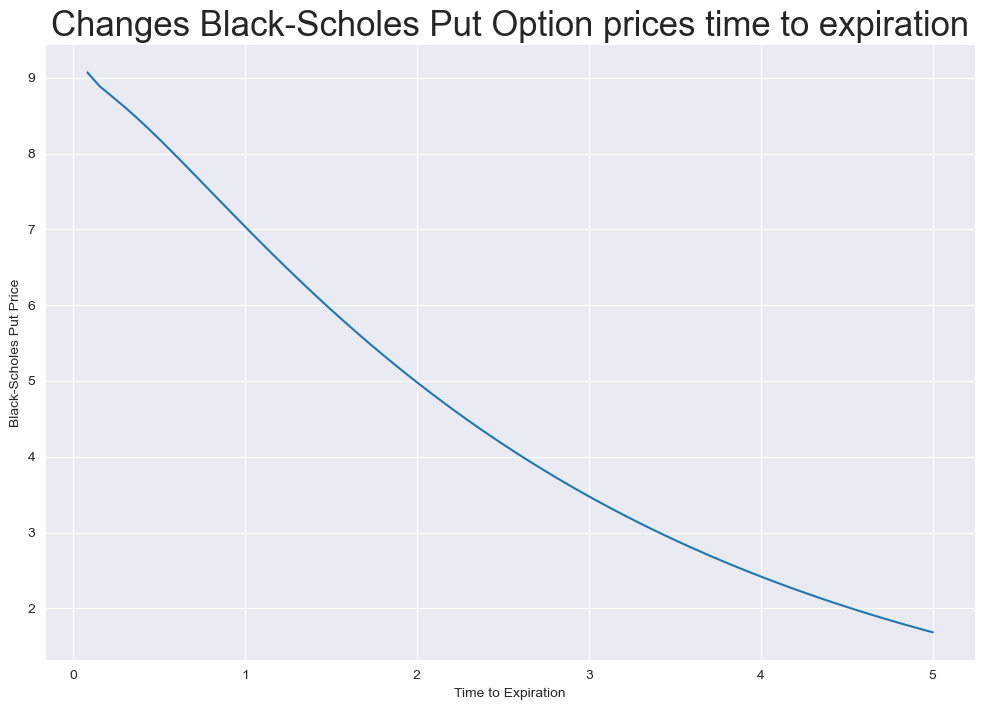

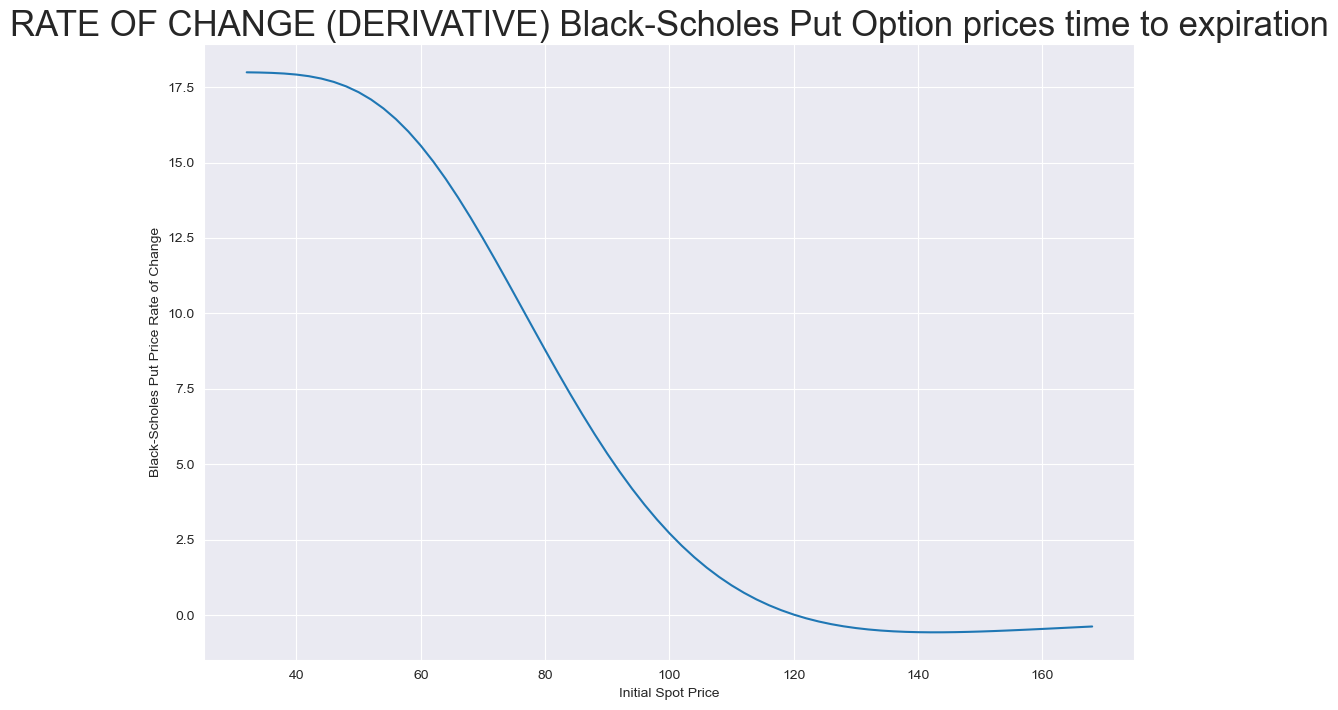

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
S0s = np.linspace(30,168,70)
r = 0.2
# To be frisky, let's add a small value of r, say 0.2


put_prices = [bs_put(S0,K,sigma, t = times[i],r=r) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

# RATE OF CHANGE

put_prices_change = [100*(bs_put(S0s[i],K,sigma, t = 1,r=r)-bs_put(S0s[i],K,sigma,t=1.01,r=r)) for i in range(len(S0s)-1)]


plt.figure(figsize = (12,8))
plt.title('RATE OF CHANGE (DERIVATIVE) Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(S0s[1:], put_prices_change)
plt.xlabel('Initial Spot Price')
plt.ylabel('Black-Scholes Put Price Rate of Change')
plt.show()

The graphs look quite similar. For the first one, if we recall put-call partity, the difference is $S - Ke^{-rt}$. With $r$ set to $0.2$ the derivative of this term, $rKe^{-rt}$ begins to approach zero with increasing $t$. This is consistent with the fact that while the call graph is concave-down and the put graph is concave-up, the rates of change are converging and both are near zero as $t$ approaches 5.

The rate of change with respect to $S_0$ is identical up to a shift since the difference between the call and put formulas is a linear function in $S_0$, and so its derivative is constant, For both call and put options, the rate of change (at t=1) approaches a constant value (0 or -17.5) as $S_0$ increases. This is consistent with the increasing call option and decreasing put option price. The small upswing at the end comes from the fact that $S_0$ is so much larger than $K$ that it is no longer a stable value.